In [44]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
import math

In [45]:
data=input_data.read_data_sets("data/MNIST/",one_hot=True) 
data.test.cls = tf.argmax(data.test.labels, axis=1)
#one_hot= Whether to make the labels into a binary array
print("Size of:")
print("Training set \t\t{}".format(len(data.train.labels)))
print("Test set\t\t{}".format(len(data.test.labels)))
print("Validation set\t\t{}".format(len(data.validation.labels)))

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Size of:
Training set 		55000
Test set		10000
Validation set		5000


In [66]:
imgSize=28
imgSizeFlat=imgSize*imgSize
imgShape=(imgSize,imgSize)
noClasses=10
noColorChannels=1
batchSize=100
logs_path = "./logs/02/visualize_graph"

In [47]:
xFlat=tf.placeholder(tf.float32,shape=[None,imgSizeFlat],name='xFlat')
x2D=tf.reshape(xFlat,[-1,imgSize,imgSize,noColorChannels])
yTrue=tf.placeholder(tf.float32,shape=[None,noClasses],name='yTrue')
yTrueClass=tf.argmax(yTrue,axis=1)

In [48]:
'''layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)'''

layer1_filterLength=5
layer1_filterHeight=5
layer1_noFilters=16

layer1_shape=[layer1_filterLength,layer1_filterHeight,noColorChannels,layer1_noFilters]
layer1_weights=tf.Variable(tf.truncated_normal(layer1_shape,stddev=0.5))
layer1_biases=tf.Variable(tf.constant(0.05,shape=[layer1_noFilters]))
layer1_out=tf.nn.conv2d(input=x2D,filter=layer1_weights,strides=[1,1,1,1],padding='SAME')
#strides=[img,x,y,colourChannel]
layer1_out=layer1_out+layer1_biases
layer1_out=tf.nn.max_pool(value=layer1_out,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
layer1_out=tf.nn.relu(layer1_out)

In [49]:
'''layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)'''


layer2_filterLength=5
layer2_filterHeight=5
layer2_noFilters=36

layer2_shape=[layer2_filterLength,layer2_filterHeight,layer1_noFilters,layer2_noFilters]
layer2_weights=tf.Variable(tf.truncated_normal(layer2_shape,stddev=0.5))
layer2_biases=tf.Variable(tf.constant(0.05,shape=[layer2_noFilters]))
layer2_out=tf.nn.conv2d(input=layer1_out,filter=layer2_weights,strides=[1,2,2,1],padding='SAME')
#strides=[img,x,y,colourChannel]
layer2_out=layer2_out+layer2_biases
#layer2_out=tf.nn.max_pool(value=layer1_out,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
layer2_out=tf.nn.relu(layer2_out)

In [50]:
'''layer_flat, num_features = flatten_layer(layer_conv2)'''
layer3_shape=layer2_out.get_shape()  # layer_shape == [num_images, img_height, img_width, num_channels]
layer3_noFeatures=int(layer3_shape[1]*layer3_shape[2]*layer3_shape[3])
layer3_out=tf.reshape(layer2_out,[-1,layer3_noFeatures])
# The shape of the flattened layer is now:
# [num_images, img_height * img_width * num_channels] -1 means "caclculate this axis size"






In [51]:
'''layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)'''
layer4_outSize=128
layer4_shape=[layer3_noFeatures,layer4_outSize]
print(layer4_shape)
layer4_weights=tf.Variable(tf.truncated_normal(layer4_shape,stddev=0.5))
layer4_biases=tf.Variable(tf.constant(0.05,shape=[layer4_outSize]))
layer4_out=tf.matmul(layer3_out,layer4_weights)+layer4_biases
layer4_out=tf.nn.relu(layer4_out)

[1764, 128]


In [52]:
'''
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)'''

layer5_outSize=10
layer5_shape=[layer4_outSize,layer5_outSize]
print(layer5_shape)
layer5_weights=tf.Variable(tf.truncated_normal(layer5_shape,stddev=0.5))
layer5_biases=tf.Variable(tf.constant(0.05,shape=[layer5_outSize]))
layer5_out=tf.matmul(layer4_out,layer5_weights)+layer5_biases
#layer5_out=tf.nn.relu(layer5_out)

[128, 10]


In [53]:
yPred=tf.nn.softmax(layer5_out)
yPredClass=tf.argmax(yPred,axis=1)

In [54]:
crossEntropy=tf.nn.softmax_cross_entropy_with_logits_v2(logits=layer5_out,labels=yTrue)
cost=tf.reduce_mean(crossEntropy)
optimizer=tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)
correctPrediction=tf.equal(yPredClass,yTrueClass)
accuracy=tf.reduce_mean(tf.cast(correctPrediction,tf.float32))


In [67]:
currentTotalIterations=0
def optimize(noIterations):
    global currentTotalIterations
    
    for it in range(currentTotalIterations,currentTotalIterations+noIterations):
        #xBatch,yTrueBatch=data.random_batch(batch_size=batchSize)
        #sess.run(optimizer,feed_dict={x:xBatch,y:yTrueBatch})
        
        sess.run(optimizer,feed_dict={xFlat:data.train.images,yTrue:data.train.labels})
        
        if it%20 == 0:
            feedDict2={xFlat:data.train.images,yTrue:data.train.labels}

            acc=sess.run(accuracy,feed_dict=feedDict2)

            print("Training iteration {} : accuracy {}.".format(it+1,acc))
    
    currentTotalIterations+=noIterations

In [56]:
def plotImages(images,clsTarget,clsPred=None):
    #print("DEBUG:{}".format(len(images)))
    assert len(images)==len(clsTarget)==9
    fig,axes=plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.4,wspace=0.4)
    
    for idx,ax in enumerate(axes.flat):
        ax.imshow(images[idx].reshape(imgShape),cmap='binary')
        if clsPred.all()==None:
            ax.set_xlabel("True: {}".format(clsTarget[idx]))
        else:
            ax.set_xlabel("True: {} Predicted: {}".format(np.argmax(clsTarget[idx]),clsPred[idx]))
            
        ax.set_xticks([])
        ax.set_yticks([])

In [57]:
def plot9Errors(yTrueClass,yPredClass):
    correct=np.equal(yTrueClass,yPredClass)
    incorrect = (correct == False)
    images = data.test.images[incorrect]
    yPredClass = yPredClass[incorrect]

    # Get the true classes for those images.
    yTrueClass = data.test.labels[incorrect]
    
    # Plot the first 9 images.
    plotImages(images=images[0:9,:],
               clsPred=yPredClass[0:9], 
               clsTarget=yTrueClass[0:9]
                )

In [58]:
def printConfusionMatrix(yTrueTemp,yPredTemp):
    accuracy
    
    cm=confusion_matrix(y_true=yTrueTemp,y_pred=yPredTemp)
    print(cm)
    plt.matshow(cm)
    plt.colorbar()
    tick_marks = np.arange(noClasses)
    plt.xticks(tick_marks, range(noClasses))
    plt.yticks(tick_marks, range(noClasses))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    

In [59]:
def printTestAccuracy():
    feedDict2={xFlat:data.test.images,yTrue:data.test.labels}

    yTrueClassTemp=sess.run(yTrueClass,{yTrue:data.test.labels})
    yPredClassTemp=sess.run(yPredClass,{xFlat:data.test.images})
    
    acc=sess.run(accuracy,feed_dict=feedDict2)
    
    print("Accuracy on test set: {}".format(acc))
    
    printConfusionMatrix(yTrueClassTemp,yPredClassTemp)
    plot9Errors(yTrueClassTemp,yPredClassTemp)
    
    
    
    


In [60]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
accuracy

<tf.Tensor 'Mean_5:0' shape=() dtype=float32>

Accuracy on test set: 0.12960000336170197
[[  0 566   0 232  11  35   0   0   0 136]
 [  0 368  11 583   0   6   0   1   0 166]
 [  3 216  44 613   3  59   0   0   0  94]
 [  0 147  20 628  13  45   0   2   0 155]
 [  0 159   0 501   5 157   0   0   0 160]
 [  0 298   2 261   3  83   0   8   0 237]
 [  0 284   2 196  22   7   0   0   0 447]
 [  0 335   0 493   1 153   0   0   0  46]
 [  0 243   4 456   2 113   0   0   0 156]
 [  0 271   1 459   0 110   0   0   0 168]]


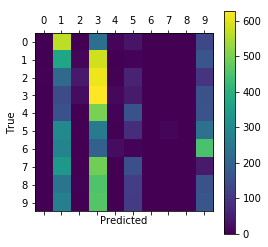

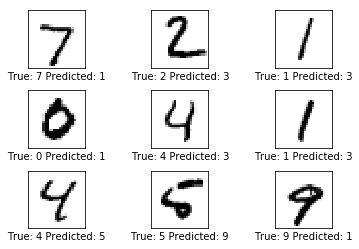

In [61]:
printTestAccuracy()

Accuracy on test set: 0.1378999948501587
[[ 47   0  60   0 828   5   0  21  18   1]
 [  0  42 578   0 259   7   0 248   0   1]
 [ 41   2 679   0 250   8   0  37  13   2]
 [ 11   0 490   1 358  48   0  70  30   2]
 [  0   0 431   0 401  86   0  21  19  24]
 [  1   3 237   0 492  33   0 115   9   2]
 [  4   0  92   0 763   5   0  86   2   6]
 [  4   0 546   0 217 160   0  83  15   3]
 [  0   0 592   0 214  51   0  54  58   5]
 [  3   0 316   0 427 125   0  84  19  35]]


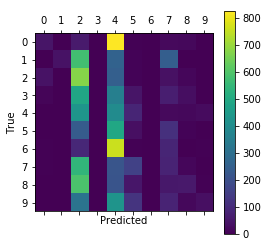

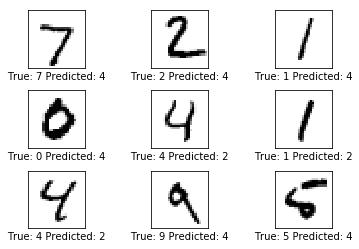

In [62]:
train_writer = tf.summary.FileWriter(logs_path, sess.graph)
optimize(1)
printTestAccuracy()

Accuracy on test set: 0.5361999869346619
[[ 613    3   53  177   15   54    5   59    0    1]
 [   0 1074   23   28    0    4    1    0    5    0]
 [  53   63  807   46   12    9    5    9   23    5]
 [  38   36  157  576   12   68    6   23   84   10]
 [   7   31  118   23  640   44   16   40    2   61]
 [  61   69   88  218   38  334   12   43   22    7]
 [  91   41  359   99  108   13  222    4   15    6]
 [  22  135   43   66   32   14    3  662    1   50]
 [  43  167  168  282   38   46   13   50  151   16]
 [  17   50   46   86  216   46    5  260    0  283]]


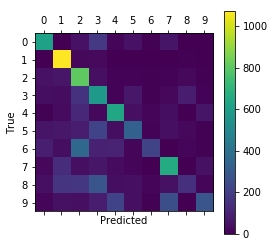

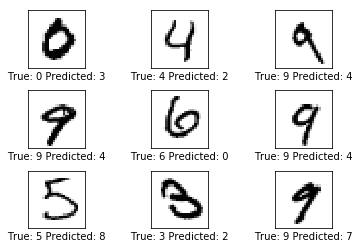

In [63]:
optimize(9)
printTestAccuracy()

Accuracy on test set: 0.9110999703407288
[[ 920    2   14    3    1    4   16    3   13    4]
 [   0 1098    7    1    3    4    6    1   14    1]
 [  17    8  924   33    8    3    3   11   24    1]
 [   2    2   18  899    2   36    5   11   31    4]
 [   1    5    5    2  923    2    9    5    7   23]
 [   7    2    1   39    8  777   12    4   32   10]
 [  17    3    3    0    6   23  899    0    6    1]
 [   0   10   11    7   16    1    0  939    6   38]
 [  20    0   17   27   11   40   10    6  826   17]
 [   7    1    6   12   21    7    0   34   15  906]]


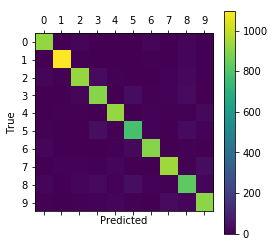

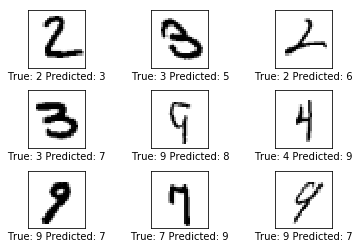

In [64]:
optimize(90)
printTestAccuracy()

In [65]:
sess.close()